In [60]:
import pandas as pd
import plotly.express as px
import os
from  datetime import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio

import common_libs.data_loader as load_data
#pip install -U kaleido

#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

In [61]:
is_py=False

In [62]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 
# Filter=1; 
# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 
# AddTextColumn(FullName(),"name");
# AddColumn(V,"volume"); 



In [63]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\PythonDev\MyQuantFinProject\Data'
result_path='D:\PythonDev\MyQuantFinProject\Data\Report'

In [64]:
file_name='ETF-World-Y18-Now.csv'
title=file_name.replace('.csv','')


data_file=os.path.join(root_path,file_name)
print(file_name," : ",title)
print(data_file)

ETF-World-Y18-Now.csv  :  ETF-World-Y18-Now
D:\PythonDev\MyQuantFinProject\Data\ETF-World-Y18-Now.csv


In [67]:
from_month_str='2022-09-30'  
# select one  prev period to find the first pct
# tf week  look back since 2022-08-25  to find pct at 2022-09-01
# tf month  look back since 2022-08-31  to find pct at 2022-09-30 
to_month_str='2022-11-30'

timeframe='W-FRI'
#timeframe='M'

col_pct='price'
col_date='date'

limit_time=12

# Export Data sicne last day of preve month (Most Impotant)

# limt 12 bars : 12 year ,2q 12 week

In [68]:
list_range=pd.date_range(start=from_month_str,end= to_month_str, freq= timeframe)
print(list_range)
if len(list_range)-1>limit_time:
    raise Exception(f'Range to process is over {limit_time}')

DatetimeIndex(['2022-09-30', '2022-10-07', '2022-10-14', '2022-10-21',
               '2022-10-28', '2022-11-04', '2022-11-11', '2022-11-18',
               '2022-11-25'],
              dtype='datetime64[ns]', freq='W-FRI')


In [69]:
buildtime = datetime.now().strftime('%d%m%y_%H%M')
print(f"PCT  {from_month_str} - {to_month_str} at {buildtime}")

PCT  2022-09-30 - 2022-11-30 at 031222_2041


In [70]:
df,list_symbol=load_data.load_offline_data(from_month_str,to_month_str,data_file)
print(f"Data {from_month_str} - {to_month_str} on {timeframe}")
print(df.info())

if  df.empty:
    print("No data according to your timeframe.")
    exit()
# print("Change Date index to column")
# df=df.reset_index(drop=False  )  
print(df.head())
print(df.tail())

Load Price Data
            symbol  price
date                     
2022-09-30  IWQU.L  42.95
2022-10-03  IWQU.L  43.10
2022-10-04  IWQU.L  44.62
           symbol   price
date                     
2022-11-28    SPY  395.91
2022-11-29    SPY  395.23
2022-11-30    SPY  407.68
Data 2022-09-30 - 2022-11-30 on W-FRI
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2022-09-30 to 2022-11-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  174 non-null    object 
 1   price   174 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB
None
            symbol  price
date                     
2022-09-30  IWQU.L  42.95
2022-10-03  IWQU.L  43.10
2022-10-04  IWQU.L  44.62
2022-10-05  IWQU.L  44.11
2022-10-06  IWQU.L  44.40
           symbol   price
date                     
2022-11-23    SPY  402.42
2022-11-25    SPY  402.33
2022-11-28    SPY  395.91
2022-11-29    SPY  395.23
2022-11-30    SPY  4

# Agg Pct of Price period of each Symbol

In [71]:
Allcols_Pct=['symbol',col_date,'pct_change']
df_Pct_Price=pd.DataFrame(columns=Allcols_Pct)
print(df_Pct_Price)

print(f"Agg Pct on {timeframe} period of each Symbol ")


print(list_symbol)

for symbol in list_symbol:

    dfx_symbol=df.query('symbol==@symbol')

    dfx_px = dfx_symbol.resample(timeframe).last()
    dfx_px=dfx_px.reset_index()


    dfx_px['pct_change']=dfx_px[col_pct].pct_change()*100
    dfx_px['pct_change']=dfx_px['pct_change'].round(1)

    dfx_px=dfx_px[[col_date,'symbol',col_pct,'pct_change']]


    dfx_px=dfx_px.dropna()
    dfx_px=dfx_px.drop(columns=[col_pct])
    dfx_px=dfx_px[Allcols_Pct]
    print(dfx_px)

    df_Pct_Price=pd.concat([df_Pct_Price, dfx_px], ignore_index=True)
print("==================================================") 
print("All Asset PCT Aggration")
print(df_Pct_Price)


Empty DataFrame
Columns: [symbol, date, pct_change]
Index: []
Agg Pct on W-FRI period of each Symbol 
['IWQU.L', 'IWVL.L', 'ACWI', 'SPY']
   symbol       date  pct_change
1  IWQU.L 2022-10-07         0.6
2  IWQU.L 2022-10-14        -1.6
3  IWQU.L 2022-10-21         1.8
4  IWQU.L 2022-10-28         4.5
5  IWQU.L 2022-11-04        -2.0
6  IWQU.L 2022-11-11         7.4
7  IWQU.L 2022-11-18         0.4
8  IWQU.L 2022-11-25         1.7
9  IWQU.L 2022-12-02        -1.0
   symbol       date  pct_change
1  IWVL.L 2022-10-07         1.2
2  IWVL.L 2022-10-14        -0.6
3  IWVL.L 2022-10-21         1.6
4  IWVL.L 2022-10-28         4.7
5  IWVL.L 2022-11-04         0.3
6  IWVL.L 2022-11-11         5.4
7  IWVL.L 2022-11-18         0.7
8  IWVL.L 2022-11-25         2.5
9  IWVL.L 2022-12-02        -1.2
  symbol       date  pct_change
1   ACWI 2022-10-07         1.5
2   ACWI 2022-10-14        -1.8
3   ACWI 2022-10-21         4.2
4   ACWI 2022-10-28         3.1
5   ACWI 2022-11-04        -1.2
6   ACWI 2

# create directory report

In [72]:
print("create directory")
folder_report=f'pct_{title}_{timeframe }_{buildtime}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

create directory
D:\PythonDev\MyQuantFinProject\Data\Report\pct_ETF-World-Y18-Now_W-FRI_031222_2041


# Final data to plot chart

In [73]:
df_Pct_Price =df_Pct_Price.sort_values(by=[col_date],ascending = [False])
df_Pct_Price =df_Pct_Price .reset_index(drop=True)
df_Pct_Price .head(len(list_symbol)*2)

,symbol,date,pct_change
0,SPY,2022-12-02,1.3
1,ACWI,2022-12-02,1.6
2,IWVL.L,2022-12-02,-1.2
3,IWQU.L,2022-12-02,-1.0
4,IWQU.L,2022-11-25,1.7
5,ACWI,2022-11-25,1.6
6,SPY,2022-11-25,1.6
7,IWVL.L,2022-11-25,2.5


Percent change  of asset on W-FRI periond since 2022-09-30 - 2022-11-30


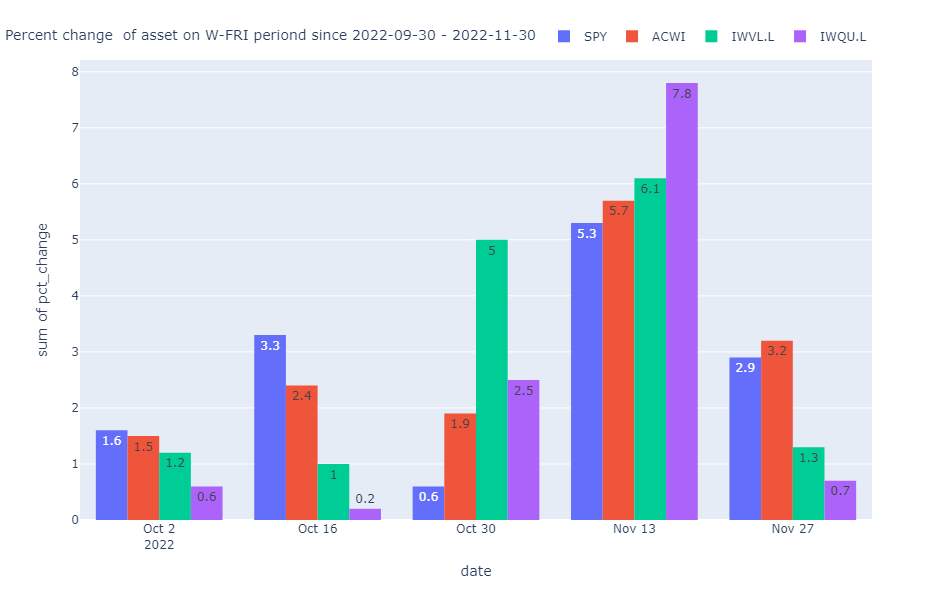

In [74]:
chart_title=f'Percent change  of asset on {timeframe} periond since {from_month_str} - {to_month_str}'
print(chart_title)
fig = px.histogram(df_Pct_Price, x=col_date, y="pct_change",text_auto=True,
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title=chart_title 
))

# fig.update_layout(
#     autosize=True,
#     width=2000,
#     height=1000,)

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [75]:
chart_title=f"Sum of Return since {from_month_str} to {to_month_str}"


dfSum_Pct_Price=  df_Pct_Price.groupby(["symbol"])[["pct_change"]].sum()
dfSum_Pct_Price.reset_index(drop=False,inplace=True)
dfSum_Pct_Pric=dfSum_Pct_Price.sort_values(by="pct_change",ascending=False)
print(chart_title)
print(dfSum_Pct_Price)


Sum of Return since 2022-09-30 to 2022-11-30
   symbol  pct_change
0    ACWI        14.7
1  IWQU.L        11.8
2  IWVL.L        14.6
3     SPY        13.7


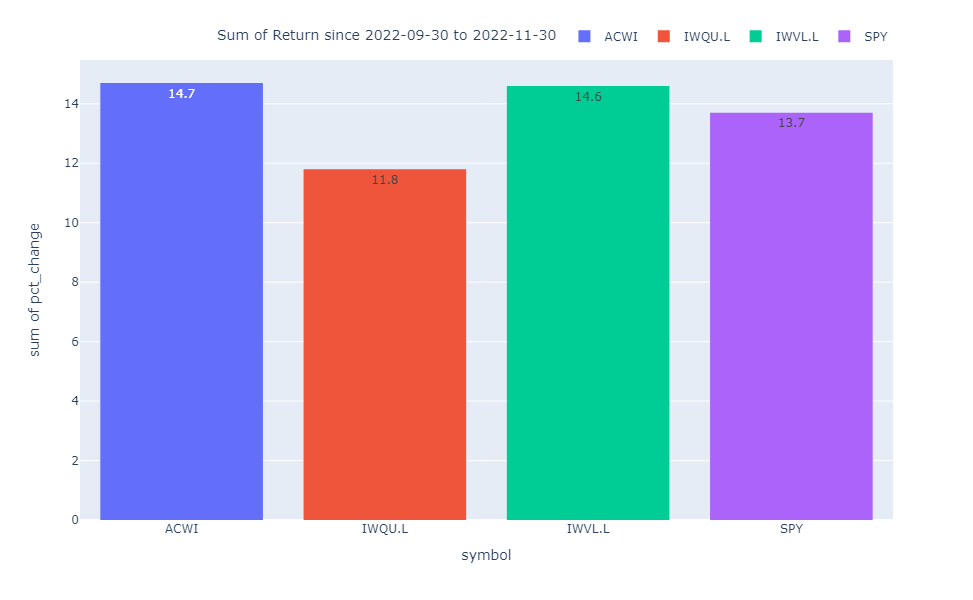

In [76]:

fig = px.histogram(dfSum_Pct_Price, x="symbol", y="pct_change",text_auto=True,
             color='symbol',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title=chart_title 
))

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")

In [77]:
print(f"Count gain or loss at {timeframe} period")
df_Pct_Price['is-gain']=df_Pct_Price.apply(lambda x: 'True' if x['pct_change']>0 else 'False' ,axis=1)
df_Pct_Price

Count gain or loss at W-FRI period


,symbol,date,pct_change,is-gain
0,SPY,2022-12-02,1.3,True
1,ACWI,2022-12-02,1.6,True
2,IWVL.L,2022-12-02,-1.2,False
3,IWQU.L,2022-12-02,-1.0,False
4,IWQU.L,2022-11-25,1.7,True
5,ACWI,2022-11-25,1.6,True
6,SPY,2022-11-25,1.6,True
7,IWVL.L,2022-11-25,2.5,True
8,IWQU.L,2022-11-18,0.4,True
9,SPY,2022-11-18,-0.6,False


In [78]:
df_PCt_Count=df_Pct_Price.groupby([col_date,'is-gain'],as_index=False).size()
df_PCt_Count.rename(columns={'size':'count'},inplace=True)
df_PCt_Count=df_PCt_Count.reset_index(drop=True)
df_PCt_Count

,date,is-gain,count
0,2022-10-07,True,4
1,2022-10-14,False,4
2,2022-10-21,True,4
3,2022-10-28,True,4
4,2022-11-04,False,3
5,2022-11-04,True,1
6,2022-11-11,True,4
7,2022-11-18,False,2
8,2022-11-18,True,2
9,2022-11-25,True,4


In [79]:
writer=pd.ExcelWriter(f'{report_path}\\Summary.xlsx',engine='xlsxwriter') 

df_Pct_Price.to_excel(writer, sheet_name="PctSymbol_Date",index=False)
df_PCt_Count.to_excel(writer, sheet_name="IsGain_Date",index=False)
writer.save()

print("Successfully")

Successfully


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_4796\935811667.py:5: FutureWarning:

save is not part of the public API, usage can give in unexpected results and will be removed in a future version

